In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import os
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedBaggingClassifier 
from usbclassifier import USBaggingClassifier
import matplotlib.pyplot as plt
import visualize_utils

In [2]:
src_dir = os.getcwd()
data_dir = os.path.join(src_dir, '..', 'data')

# Compare Decision Regions On Binary Classification
* Simple RF : RandomForestClassifier  
* RF class weighted : Weighted RandomForestClassifier (sklearn options class_weight='balanced')  
* USBaggingClassifier (RF) : Bagging Classifier with Under Sampling using Simple RF (The package is created by me)
* BalancedBaggingClassifier (RF) : Bagging Classifier with Under Sampling using Simple RF(imbalanced-learn)

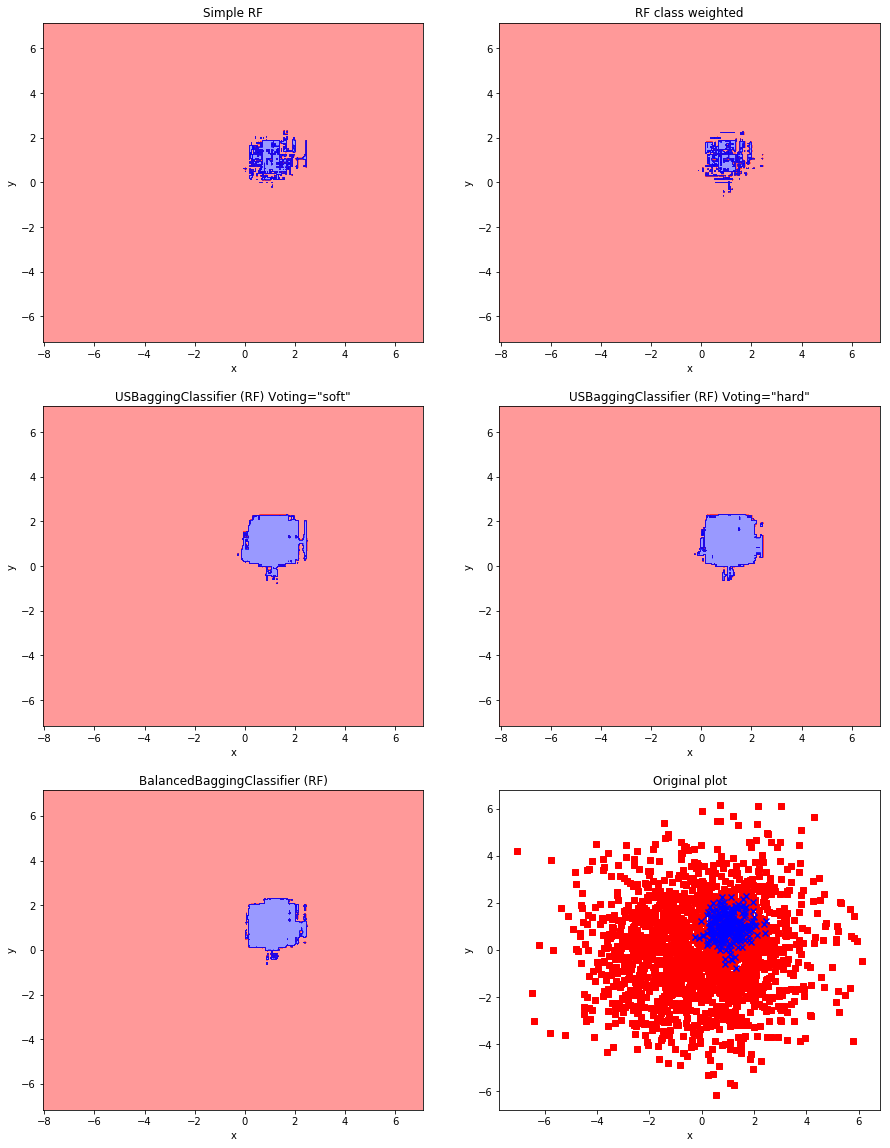

In [12]:
# read csv
binary_toy = pd.read_csv(os.path.join(data_dir, 'binary_toydata.csv'))

X = np.array(binary_toy.drop('response', axis=1))
y = np.array(binary_toy.response)

# Simple Random Forest
rf_model = RandomForestClassifier(n_jobs=-1)
rf_model.fit(X, y)
plt.figure(figsize=[15,20])
plt.subplot(321)
visualize_utils.plot_decision_regions(X, y, rf_model, only_regions=True)
plt.title('Simple RF')

# Weighted Random Forest
rf_model = RandomForestClassifier(class_weight='balanced', n_jobs=-1)
rf_model.fit(X, y)
plt.subplot(322)
visualize_utils.plot_decision_regions(X, y, rf_model,only_regions=True)
plt.title('RF class weighted')

# USBaggingClassifier soft voting
rf_model = RandomForestClassifier(n_jobs=-1)
usbc = USBaggingClassifier(base_estimator=rf_model, n_jobs=-1, n_estimators=10, voting='soft')
X_df = binary_toy.drop('response', axis=1)
y_ss = binary_toy.response
usbc.fit(X_df, y_ss)
plt.subplot(323)
visualize_utils.plot_decision_regions(X, y, usbc,only_regions=True)
plt.title('USBaggingClassifier (RF) Voting="soft"')
          
# USBaggingClassifier hard voting
rf_model = RandomForestClassifier(n_jobs=-1)
usbc = USBaggingClassifier(base_estimator=rf_model, n_jobs=-1, n_estimators=10, voting='hard')
X_df = binary_toy.drop('response', axis=1)
y_ss = binary_toy.response
usbc.fit(X_df, y_ss)
plt.subplot(324)
visualize_utils.plot_decision_regions(X, y, usbc,only_regions=True)
plt.title('USBaggingClassifier (RF) Voting="hard"')

# BalancedBagingClassifier
rf_model = RandomForestClassifier(n_jobs=-1)
usbc = BalancedBaggingClassifier(base_estimator=rf_model, n_jobs=-1, n_estimators=10, ratio='not minority')
usbc.fit(X, y)
plt.subplot(325)
visualize_utils.plot_decision_regions(X, y, usbc,only_regions=True)
plt.title('BalancedBaggingClassifier (RF)')

# original plot
plt.subplot(326)
positive = binary_toy[binary_toy.response == 1]
negative = binary_toy[binary_toy.response == 0]
plt.scatter(negative.feature_x, negative.feature_y, c='red',marker='s')
plt.scatter(positive.feature_x, positive.feature_y, c='blue',marker='x')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Original plot')

# Compare Decision Regions On Multi-Class Classification
* Simple RF : RandomForestClassifier  
* RF class weighted : Weighted RandomForestClassifier (sklearn options class_weight='balanced')  
* USBaggingClassifier (RF) : Bagging Classifier with Under Sampling using Simple RF

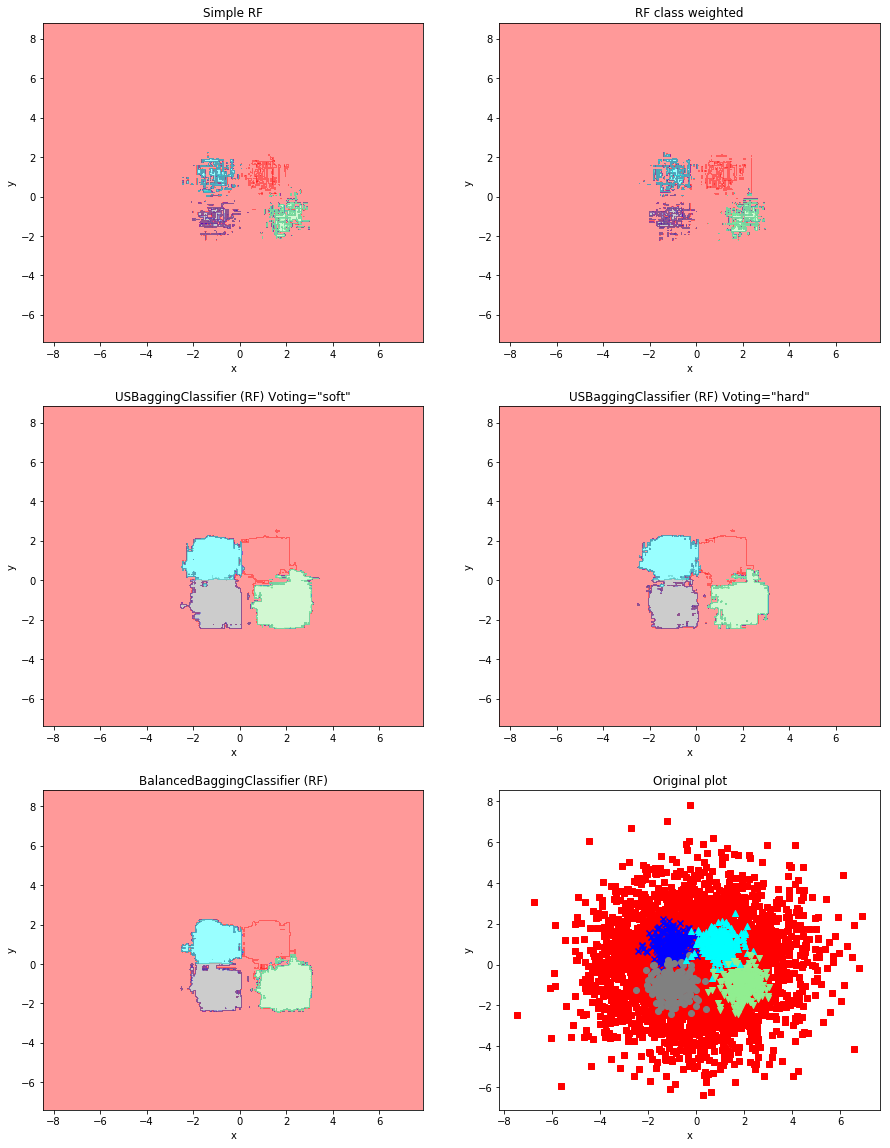

In [14]:
# read_csv
multi_toy = pd.read_csv(os.path.join(data_dir, 'multi_toydata.csv'))
X = np.array(multi_toy.drop('response', axis=1))
y = np.array(multi_toy.response)

# Simple Random Forest
rf_model = RandomForestClassifier(n_jobs=-1)
rf_model.fit(X, y)
plt.figure(figsize=[15,20])
plt.subplot(321)
visualize_utils.plot_decision_regions(X, y, rf_model, only_regions=True)
plt.title('Simple RF')

# Weighted Random Forest
rf_model = RandomForestClassifier(class_weight='balanced', n_jobs=-1)
rf_model.fit(X, y)
plt.subplot(322)
visualize_utils.plot_decision_regions(X, y, rf_model,only_regions=True)
plt.title('RF class weighted')

# USBaggingClassifier soft voting
rf_model = RandomForestClassifier(n_jobs=-1)
usbc = USBaggingClassifier(base_estimator=rf_model, n_jobs=-1, n_estimators=10, voting='soft')
X_df = multi_toy.drop('response', axis=1)
y_ss = multi_toy.response
usbc.fit(X_df, y_ss)
plt.subplot(323)
visualize_utils.plot_decision_regions(X, y, usbc,only_regions=True)
plt.title('USBaggingClassifier (RF) Voting="soft"')
          
# USBaggingClassifier hard voting
rf_model = RandomForestClassifier(n_jobs=-1)
usbc = USBaggingClassifier(base_estimator=rf_model, n_jobs=-1, n_estimators=10, voting='hard')
X_df = multi_toy.drop('response', axis=1)
y_ss = multi_toy.response
usbc.fit(X_df, y_ss)
plt.subplot(324)
visualize_utils.plot_decision_regions(X, y, usbc,only_regions=True)
plt.title('USBaggingClassifier (RF) Voting="hard"')

# BalancedBagingClassifier
rf_model = RandomForestClassifier(n_jobs=-1)
usbc = BalancedBaggingClassifier(base_estimator=rf_model, n_jobs=-1, n_estimators=10, ratio='not minority')
usbc.fit(X, y)
plt.subplot(325)
visualize_utils.plot_decision_regions(X, y, usbc,only_regions=True)
plt.title('BalancedBaggingClassifier (RF)')

# original plot
plt.subplot(326)
for i, color, marker in zip(multi_toy.response.value_counts().index.tolist(),
                            ('red', 'blue', 'gray', 'cyan', 'lightgreen'), 
                            ('s', 'x', 'o', '^', 'v')):
    one_class_df = multi_toy[multi_toy.response == i]
    plt.scatter(one_class_df.feature_x, one_class_df.feature_y, c=color, marker=marker)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Original plot')